In [ ]:
# %pip install numpy tifffile matplotlib

In [1]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Pre-processing steps in CaImAn


1. **Check and Interpolate Missing Data**:
   - **Description**: Checks for missing data (NaNs) in the input movie `Y` and interpolates to fill these gaps.
   - **Purpose**: Ensuring data continuity and integrity by addressing missing or corrupted frames in the imaging sequence.

2. **Noise Estimation**:
   - **Description**: Estimates the noise level in the movie using the power spectral density (PSD) of the signal.
   - **Purpose**: Accurate noise estimation is crucial for subsequent processing steps, as it influences the extraction of neural signals.

3. **Estimation of Temporal Components (AR Coefficients)**:
   - **Description**: Estimates the autoregressive (AR) model coefficients (time constants) for the movie.
   - **Purpose**: The AR model coefficients are important for understanding the temporal dynamics of the calcium signal.

4. **Return Preprocessed Data and Parameters**:
   - **Description**: The function returns the preprocessed movie, the estimated noise level, the AR coefficients, and a placeholder (None) for future use.
   - **Purpose**: Provides the necessary outputs for further processing steps in the calcium imaging data analysis pipeline.

This function is a part of the preprocessing stage in calcium imaging data analysis, setting up the data for more advanced processing like source extraction and activity analysis. The steps are designed to ensure data quality and to extract essential parameters that describe the noise and temporal dynamics of the imaging data.

In [2]:
with tiff.TiffFile('../data/example_nan_frames.tif') as tif:
    frames = [page.asarray() for page in tif.pages]

frames = frames[0]

## Interpolating missing data

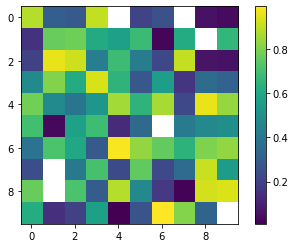

In [3]:
# plot frame 1
plt.imshow(frames[0])
plt.colorbar()

In [4]:
# are there any nan values in frame 1
frame = frames[0]
np.isnan(frame).any()

True

In [5]:
# are there any nan values in frame 2
frame = frames[1]
np.isnan(frame).any()

True

In [6]:
# are there any nan values in frame 3
frame = frames[2]
np.isnan(frame).any()

True

In [7]:
# all three frames have nan values in them

False

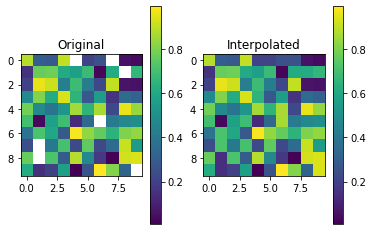

In [11]:
frame = frames[0].copy()
height, width = frame.shape

# generate a grid of indices covering the entire image
x, y = np.indices((height, width)) 

# Extracting Points and Values for Interpolation
points = np.array((x[~np.isnan(frame)], y[~np.isnan(frame)])).T
values = frame[~np.isnan(frame)]

# Identifying Pixels that Need to be Interpolated:
grid_x, grid_y = x[np.isnan(frame)], y[np.isnan(frame)]

# Performing the Interpolation
frame[np.isnan(frame)] = griddata(points, values, (grid_x, grid_y), method='nearest')


plt.subplot(121)
plt.imshow(frames[0])
plt.title('Original')
plt.colorbar()

plt.subplot(122)
plt.imshow(frame)
plt.title('Interpolated')
plt.colorbar()

# no more missing values
# Lets also check it to make sure

np.isnan(frame).any()

# False means there are no NaN values in the frame anymore

## Noise Estimation